# Contrastes de hipótesis 

Dentro de la inferencia estadística, un contraste de hipótesis (también denominado test de hipótesis o prueba de significación) es un procedimiento para juzgar si una propiedad que se supone en una población estadística es compatible con lo observado en una muestra de dicha población.

La mayoría de las veces, vamos a realizar **T-test** o **Z-test**

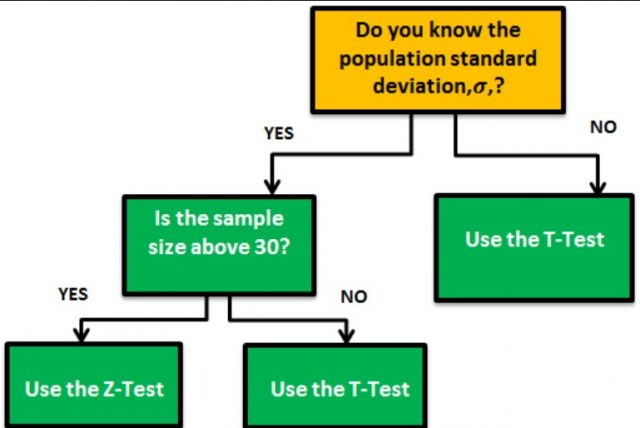

## T-Test

En una **prueba t de Student**, o **Test-T**, el estadístico utilizado tiene una distribución t de Student si la hipótesis nula es cierta. Se aplica cuando la población estudiada sigue una distribución normal, pero el tamaño muestral es pequeño 

### T-test de una muestra
Se utiliza para contrastar si la media de una población es igual a un cierto valor, o no. 

El estadístico se calcula como 

$$t=\frac{\bar{x}-\mu}{SE}$$

donde $SE$ es el erorr estándar: $SE = \frac{s}{\sqrt{n}}$ y $s$ es la desviación estándar de la muestra.

Por ejemplo, queremos saber si la media del peso de una especie de tortuga que habita en Costa Rica es igual a 310 gramos. Para contrastarlo, recolectamos una serie de muestras de tortugas con los siguientes pesos: 

`Pesos = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]`

**Primer paso**: establecemos la hipótesis nula (H0) y la hipótesis alternativa 

$H_0: \mu = 310$

$H_a: \mu \neq 310$

El tipo de hipótesis alternativa Ha define si una prueba es de una cola (unilateral) o de dos colas (bilateral).  

**Pruebas bilaterales o de dos colas**: La hipótesis alternativa contiene el signo "$\neq$"

**Pruebas unilaterales o de una cola**: La hipótesis alternativa contiene "$>$" o "$<$"

En este ejemplo, tendríamos una prueba bilateral.

![img](https://miro.medium.com/max/862/1*VXxdieFiYCgR6v7nUaq01g.jpeg)

**Segundo paso**: Calculamos el estadístico

In [2]:
import numpy as np
data = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]
SE = np.std(data, ddof=1)/np.sqrt(len(data))
t = (np.mean(data)-310)/SE
t

-1.5848116313861251

**Tercer paso**: Para conocer el p-valor, buscamos en la tabla de t-student con n-1 grados de libertad. En este ejemplo, `n=13`, luego los grados de libertad son 12  

[Enlace a la tabla](https://cdn.scribbr.com/wp-content/uploads/2022/06/Critical-values-of-t-for-one-tailed-tests-l.webp)

En la tabla, tenemos que buscar la fila correspondiente a 12 grados de libertad y buscar el valor absoluto de nuestro test estadístico 1.58.
Aunque el valor de 1.58 no aparezca en la tabla, éste se encuentra entre los valores 1.356 y 1.782.

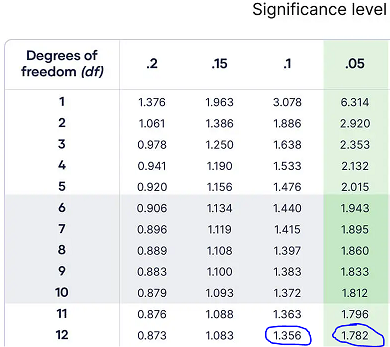

Lo que hacemos es buscar los valores de significancia ($\alpha$) para esos valores. En este ejemplo, vemos que el estadístico calculado está entre α=0.10 y α=0.05. 

Esto significa que para un test unilateral, el p-valor se encuentra entre 0.1 y 0.05. Pongamos que el p-valor (unilateral) es igual a 0.075. Al ser el nuestro un test bilateral, tenemos que multiplicar este valor por 2, por lo que nuestro p-valor estimado es 0.075 x 2 = 0.15.

También podemos utilizar librerías en Python que nos ayuden a calcularlo

In [3]:
import scipy.stats as stats

stats.ttest_1samp(a=data,popmean=310)

Ttest_1sampResult(statistic=-1.5848116313861254, pvalue=0.1389944275158753)

Como el **p-valor** del test **no es inferior a 0.05**, no podemos rechazar la hipótesis nula, es decir, no tenemos evidencias suficientes para decir que la media de peso de esta especie de tortuga es diferente de 310 gramos.

También existen [calculadoras online](https://www.statology.org/t-score-p-value-calculator/) que nos permiten realizar los mismos cálculos

![img](https://www.statisticshowto.com/wp-content/uploads/2014/02/t-distribution2.jpg)

<font color='red'>**Do it yourself**</font>: Se rumorea que el tamaño medio de los miembros viriles de la tribu Daasanach en Etiopía es **superior a 32 centímetros**. Para comprobarlo, viajas a Adís Abeba y colectas, con rigor científico, las siguientes mediciones: 31,30,31,28,36,35,29,31,32,34,33,35,36,34,32,34,36,36,35.

Implementa un test de hipótesis para determinar si la media del tamaño es realmente superior a 32 centímetros.

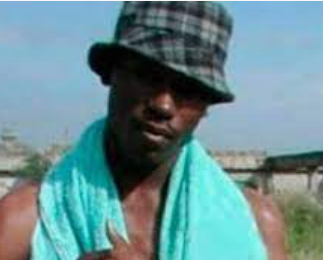

**$H_0$** (hipótesis nula): $\mu\leq32$ cm  
**$H_a$** (hipótesis alternativa): $\mu>32$ cm


In [5]:
import scipy.stats as stats
data = [31,30,31,28,36,35,29,31,32,34,33,35,36,34,32,34,36,36,35]
stats.ttest_1samp(a=data,popmean=32,alternative='greater')

Ttest_1sampResult(statistic=1.8156825980064097, pvalue=0.04305760924787739)

En este ejemplo, podemos rechazar la hipótesis nula y aceptar la alternativa

### T-test para dos muestras
Cuando tenemos dos poblaciones, el estadístico se calcula con la siguiente fórmula:

$$t = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

Ejemplo: Queremos comprobar el desempeño de dos call centers en términos de longitud media de las llamadas y encontrar si hay diferencias estadísticamente significativas. 

**$H_0$** (hipótesis nula): no hay diferencia entre la media del tiempo de llamadas entre ambos call centers  
**$H_a$** (hipótesis alternativa): existe una diferencia entre la media del tiempo de llamadas de ambos call centers

Seleccionamos aleatoriamente 20 llamadas de cada call center y medimos la longitud media de cada llamada (en segundos):


Call Center A: 115, 138, 109, 141, 139, 131, 123, 128, 144, 167, 134, 142, 174, 149, 115, 152, 131, 161, 131, 121  
Call Center B: 137, 125, 86, 121, 101, 110, 129, 136, 102, 114, 131, 109, 119, 144, 145, 121, 137, 131, 134, 126  

In [6]:
# Call Center A
A = [115, 138, 109, 141, 139, 131, 123, 128, 144, 167, 134, 142, 174, 149, 115, 152, 131, 161, 131, 121]
print(np.mean(A))
print(np.std(A,ddof=1))

137.25
17.335315338774105


In [7]:
# Call Center B
B = [137, 125, 86, 121, 101, 110, 129, 136, 102, 114, 131, 109, 119, 144, 145, 121, 137, 131, 134, 126]
print(np.mean(B))
print(np.std(B,ddof=1))

122.9
15.47119564664742


In [8]:
# Calculamos el estadístico
x1 = np.mean(A)
s1 = np.std(A,ddof=1)
n1 = len(A)

x2 = np.mean(B)
s2 = np.std(B,ddof=1)
n2 = len(B)

numerador = (x1-x2) - 0
denominador = np.sqrt(s1**2/n1 + s2**2/n2)
t = numerador/denominador
t

2.7619885769038945

El valor de los grados de libertad se calcula como $df = n_1 + n_2 -2$. En este caso, $20+20-2 = 38$  
Buscamos el valor en la [tabla](https://www.tutorialspoint.com/statistics/t_distribution_table.htm) para 38 grados de libertad y prueba bilateral (*two tails*), obteniendo 2.0244
Como el valor obtenido de t supera el valor crítico (2.76>2.02) podemos rechazar la hipótesis nula y asegurar, bajo las evidencias dadas, que la hipótesis alternativa es verdadera. Es decir, existe una diferencia de desempeño entre ambos call centers.

In [9]:
# Con la librería stats
import scipy.stats as stats
stats.ttest_ind(a=A, b=B, alternative='two-sided')

Ttest_indResult(statistic=2.761988576903894, pvalue=0.008802045351068374)

## Z-Test

El procedimiento es casi idéntico al t-test, pero en lugar de utilizar la distribución t-student, nos fijaremos en la distribución normal.

Este tipo de test casi no se utiliza, ya que en general no tenemos acceso a la desviación estándar de la población

### Z-test de una muestra

Si el tamaño de la muestra es superior a 30, y conocemos la desviación típica de la población, el estadístico se calcula como 

$$z=\frac{\bar{x}-\mu}{SE}$$

donde $SE$ es el erorr estándar: $SE = \frac{\sigma}{\sqrt{n}}$ y $\sigma$ es la desviación estándar de la población

En este caso, el estadístico sigue una distribución normal N(0,1)




### Z-test de dos muestras

Cuando tenemos dos poblaciones, el estadístico se calcula como 

$$z = \frac{(\bar{x_1}-\bar{x_2})-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$


En ambos casos, el estadístico sigue una distribución normal N(0,1)


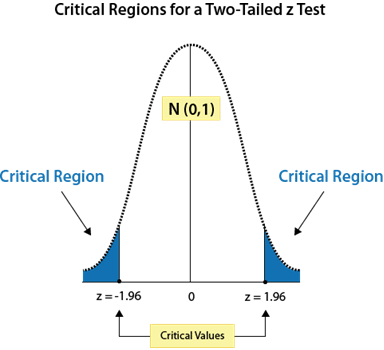

Valor crítico unilateral: 1.65  
Valor crítico bilateral: 1.96

### Z-test para proporciones

El concepto es idéntico a los test anteriores, pero en lugar de comparar medias, comparamos proporciones, por ejemplo: 
- Efectividad de medicamentos (proporción de personas que han mejorado tras un tratamiento)
- Resultados electorales (proporción de personas que votan a cada candidato)
- Comportamiento de consumidores (proporción de consumidores que compran un producto)
- Resultados de encuestas (proporción de personas que responden en dos regiones diferentes)
- **A/B testing**: En estudios de mercado, se implementan dos versiones de un producto (A y B) y se prueban en diferentes grupos de usuarios

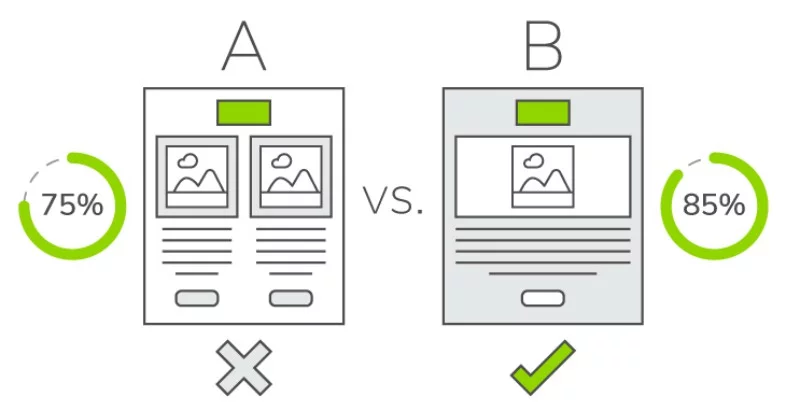

El estadístico se calcula con la siguiente fórmula:

$$z = \frac{p1-p2}{\sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2})}}$$

donde:
- $p_1$ es la proporción de la primera muestra
- $p_2$ es la proporción de la segunda muestra
- $n_1$ es el número de ejemplos de la muestra 1
- $n_2$ es el número de ejemplos de la muestra 2
- $p=\frac{k_1+k_2}{n_1+n_2}$, siendo $k_1$ el número de éxitos en la primera muestra y $k_2$ en la segunda 


**Ejemplo**: Para conseguir registros en nuestra web, creamos dos secciones de registro diferentes (una más colorida, y otra más sobria). 

El primer diseño se muestra a 200 personas, de las cuales conseguimos 130 registros (65% de conversiones)  
El segundo diseño se muestra a 100 personas, de las cuales conseguimos 56 registros (56% de conversiones)

¿Es esta diferencia estadísticamente significativa? ¿Qué opción escojo?

1. Definimos las hipótesis  
$H_0: p_1=p_2$  
$H_1: p_1>p_2$


2. Calculamos el estadístico  

In [10]:
p = (130+56)/(200+100)
num = (0.65-0.56)
den = np.sqrt(p*(1-p)*(1/200+1/100))
z = num/den
z

1.5139419980680997

3. Comparamos con la distribución normal 

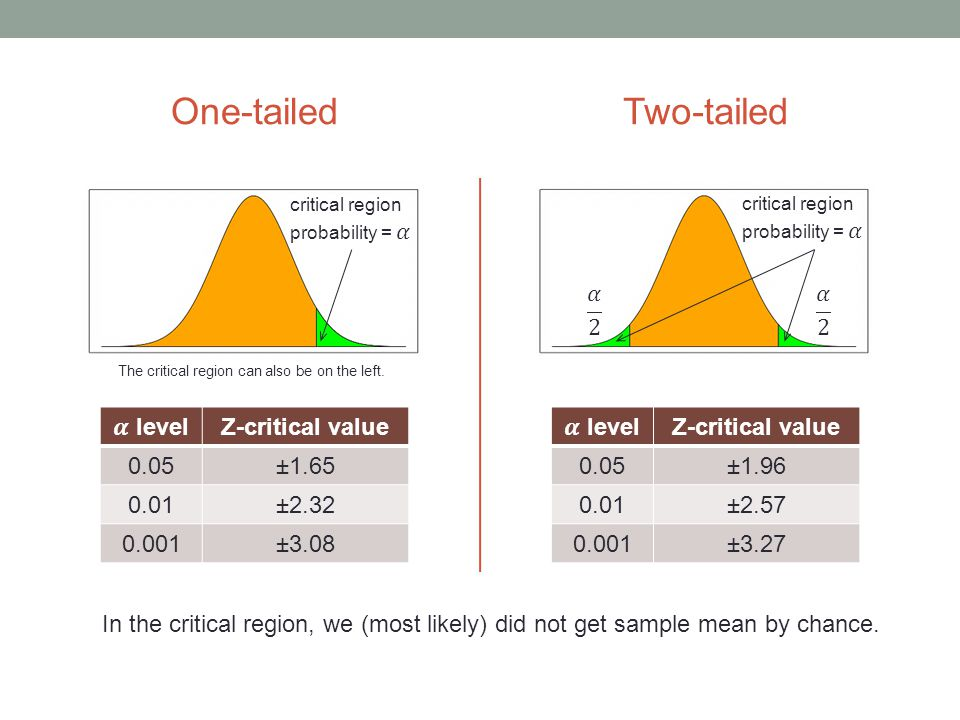

En este ejemplo, al ser un test unilateral, para un nivel de confianza del 95%, el estadístico debería ser superior a 1.65.  
Como no lo es, no podemos rechazar la hipótesis nula ni asegurar que una de las opciones de la web es mejor que la otra

Es más sencillo implementarlo en Python:

In [16]:
from statsmodels.stats.proportion import proportions_ztest
exitos = np.array([130,56])
muestras = np.array([200,100])

(z,pvalor) = proportions_ztest(count=exitos, nobs=muestras, alternative='larger')

print(z)
print(pvalor)

1.5139419980680997
0.06502027550522334


## Significancia de la correlación

Una correlación alta puede resultar no significativa, sobre todo si el número de muestras es pequeño.  
Para conocer la significancia de la correlación, podemos implementar un t-test estadístico con la siguiente fórmula:

$$t=\frac{\rho}{\sqrt{\frac{1-\rho^2}{n-2}}}$$

donde $\rho$ es el valor de la correlación y $n$ el número de muestras. 

Este estadístico sigue una distribución t-student con n-2 grados de libertad

**Ejemplo** Observamos un coeficiente de correlación de 0.5 entre la temperatura media anual y el consumo de pan en 10 ciudades diferentes. ¿Es esta correlación significativa?

In [17]:
t = 0.5/np.sqrt((1-0.5**2)/(10-2))
t

1.6329931618554523

El valor de t-student para 8 grados de libertad y confianza del 95% es de 1.86, por tanto, no podemos rechazar la hipótesis nula ni afirmar que exista relación estadísticamente significativa entre ambas variables.

[Ejemplos de correlaciones espurias](https://www.tylervigen.com/spurious-correlations)

In [18]:
cage = [2,2,2,3,1,1,2,3,4,1,4]
pool = [109,102,102,98,85,95,96,98,123,94,102]

In [19]:
from scipy.stats import pearsonr
pearsonr(cage,pool)

PearsonRResult(statistic=0.6660043486679172, pvalue=0.02526854713104544)

## Resumen

Aunque puede parecer complejo, un test de hipótesis no deja de ser una receta donde hay que seguir los siguientes pasos:  

1. Definir las hipótesis nula y alternativa (una vez definido ya sabemos si es un test unilateral ("<", ">") o bilateral (≠)
2. Saber qué estadístico utilizar, dependiendo del caso (t-test, z-test)
3. Comparar el valor del estadístico con los valores críticos. Si el estadístico calculado supera el valor crítico, el p-valor será inferior a 0.05 y podremos rechazar la hipótesis nula

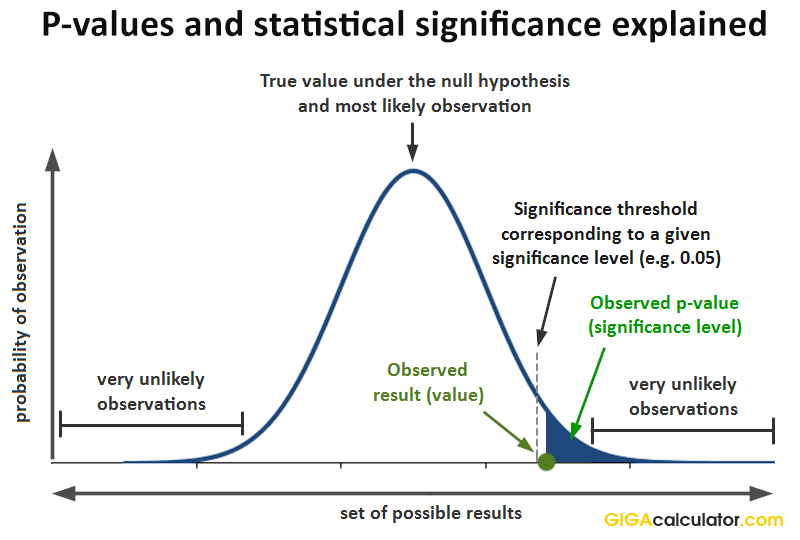